In [7]:
# load the pt-pt json file into a dataframe
import pandas as pd
import os 

df = pd.DataFrame()

for json_file in os.listdir('dataset'):
    df = pd.concat([df, pd.read_json('dataset/' + json_file, lines=True)])
    print(f"Added {json_file} to dataframe")

Added af-ZA.jsonl to dataframe
Added am-ET.jsonl to dataframe
Added ar-SA.jsonl to dataframe
Added az-AZ.jsonl to dataframe
Added bn-BD.jsonl to dataframe
Added cy-GB.jsonl to dataframe
Added da-DK.jsonl to dataframe
Added de-DE.jsonl to dataframe
Added el-GR.jsonl to dataframe
Added en-US.jsonl to dataframe
Added es-ES.jsonl to dataframe
Added fa-IR.jsonl to dataframe
Added fi-FI.jsonl to dataframe
Added fr-FR.jsonl to dataframe
Added he-IL.jsonl to dataframe
Added hi-IN.jsonl to dataframe
Added hu-HU.jsonl to dataframe
Added hy-AM.jsonl to dataframe
Added id-ID.jsonl to dataframe
Added is-IS.jsonl to dataframe
Added it-IT.jsonl to dataframe
Added ja-JP.jsonl to dataframe
Added jv-ID.jsonl to dataframe
Added ka-GE.jsonl to dataframe
Added km-KH.jsonl to dataframe
Added kn-IN.jsonl to dataframe
Added ko-KR.jsonl to dataframe
Added lv-LV.jsonl to dataframe
Added ml-IN.jsonl to dataframe
Added mn-MN.jsonl to dataframe
Added ms-MY.jsonl to dataframe
Added my-MM.jsonl to dataframe
Added nb

In [8]:
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id,slot_method,judgments
0,0,af-ZA,test,alarm,alarm_set,maak my wakker om vyf v. m. die week,maak my wakker om [time : vyf v. m.] [date : d...,37,"[{'slot': 'time', 'method': 'localization'}, {...","[{'worker_id': '20', 'intent_score': 1, 'slots..."
1,1,af-ZA,train,alarm,alarm_set,maak my wakker nege-uur v. m. op vrydag,maak my wakker [time : nege-uur v. m.] op [dat...,20,"[{'slot': 'time', 'method': 'translation'}, {'...","[{'worker_id': '40', 'intent_score': 1, 'slots..."
2,2,af-ZA,train,alarm,alarm_set,stel 'n alarm vir twee ure van nou af,stel 'n alarm vir [time : twee ure van nou af],20,"[{'slot': 'time', 'method': 'translation'}]","[{'worker_id': '64', 'intent_score': 1, 'slots..."
3,3,af-ZA,test,audio,audio_volume_mute,stil,stil,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."
4,4,af-ZA,train,audio,audio_volume_mute,janneman stilte,janneman stilte,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."


calendar          120870
play              103224
qa                 85935
email              70431
iot                56457
general            49113
weather            43605
transport          41055
lists              40443
news               36159
recommendation     30396
datetime           29478
social             28815
alarm              28050
music              23919
audio              19737
takeaway           18258
cooking            16626
Name: scenario, dtype: int64
calendar          0.143454
play              0.122511
qa                0.101991
email             0.083591
iot               0.067006
general           0.058289
weather           0.051752
transport         0.048726
lists             0.048000
news              0.042915
recommendation    0.036075
datetime          0.034986
social            0.034199
alarm             0.033291
music             0.028388
audio             0.023425
takeaway          0.021669
cooking           0.019732
Name: scenario, dtype: float64


<AxesSubplot: >

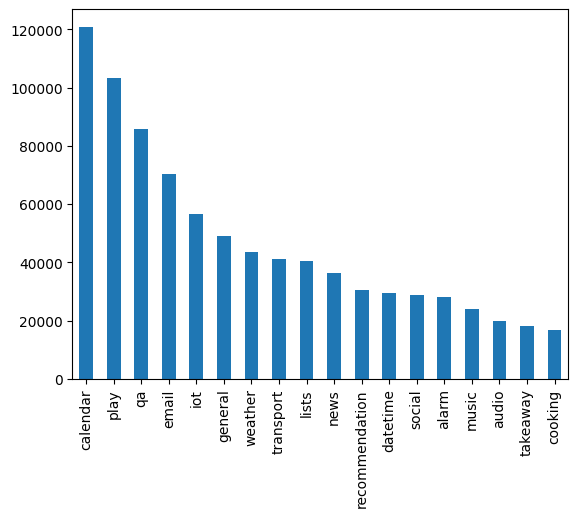

In [9]:
print(df['scenario'].value_counts())

print(df['scenario'].value_counts(normalize=True))

df['scenario'].value_counts().plot(kind='bar')

af-ZA    16521
sl-SL    16521
ml-IN    16521
mn-MN    16521
ms-MY    16521
my-MM    16521
nb-NO    16521
nl-NL    16521
pl-PL    16521
pt-PT    16521
ro-RO    16521
ru-RU    16521
sq-AL    16521
ko-KR    16521
sv-SE    16521
sw-KE    16521
ta-IN    16521
te-IN    16521
th-TH    16521
tl-PH    16521
tr-TR    16521
ur-PK    16521
vi-VN    16521
zh-CN    16521
lv-LV    16521
kn-IN    16521
am-ET    16521
fi-FI    16521
ar-SA    16521
az-AZ    16521
bn-BD    16521
cy-GB    16521
da-DK    16521
de-DE    16521
el-GR    16521
en-US    16521
es-ES    16521
fa-IR    16521
fr-FR    16521
km-KH    16521
he-IL    16521
hi-IN    16521
hu-HU    16521
hy-AM    16521
id-ID    16521
is-IS    16521
it-IT    16521
ja-JP    16521
jv-ID    16521
ka-GE    16521
zh-TW    16521
Name: locale, dtype: int64
af-ZA    0.019608
sl-SL    0.019608
ml-IN    0.019608
mn-MN    0.019608
ms-MY    0.019608
my-MM    0.019608
nb-NO    0.019608
nl-NL    0.019608
pl-PL    0.019608
pt-PT    0.019608
ro-RO    0.019608
ru-RU    0

<AxesSubplot: >

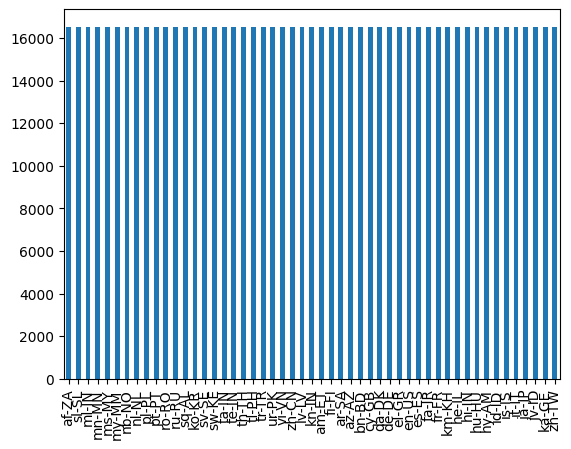

In [42]:
print(df['locale'].value_counts())

print(df['locale'].value_counts(normalize=True))

df['locale'].value_counts().plot(kind='bar')

<AxesSubplot: >

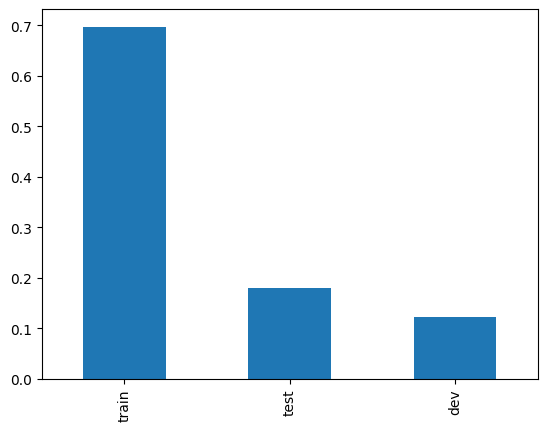

In [10]:
# plot the distribution of partitions with the percentage of each partition
df['partition'].value_counts(normalize=True).plot(kind='bar')

In [11]:
df_train = df[df['partition'] == 'train']
df_test = df[(df['partition'] == 'test')]
df_dev = df[(df['partition'] == 'dev')]


In [12]:
corpus_train = df_train['utt'].tolist()
corpus_dev = df_dev['utt'].tolist()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(corpus_train)

X_dev = vectorizer.transform(corpus_dev)
print(X_train.shape, X_dev.shape)

(587214, 294176) (103683, 294176)


In [26]:
print(vectorizer.get_feature_names_out())

['a5' 'aa' 'aabot' ... '힘들었어' '힙합' '２つめのポッドキャストを再生して']


In [27]:
y_train = df_train[['intent', 'locale']]
y_dev = df_dev[['intent', 'locale']]

print(X_train.shape, y_train.shape, X_dev.shape, y_dev.shape)

(587214, 294176) (587214, 2) (103683, 294176) (103683, 2)


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier(MultinomialNB())
clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [29]:
y_pred = clf.predict(X_dev)
print(y_pred)

[['iot_hue_lightoff' 'af-ZA']
 ['iot_hue_lightdim' 'af-ZA']
 ['calendar_set' 'af-ZA']
 ...
 ['email_sendemail' 'it-IT']
 ['calendar_set' 'af-ZA']
 ['calendar_set' 'af-ZA']]


In [34]:
clf.score(X_dev, y_dev)

0.6079010059508309

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_dev_intents = y_dev['intent'].tolist()
y_pred_intents = y_pred[:, 0].tolist()

y_dev_locales = y_dev['locale'].tolist()
y_pred_locales = y_pred[:, 1].tolist()

print(f"-----Results for intents-----\n\n")
# accuracy, precision, recall, f1
print(f"Accuracy: {accuracy_score(y_dev_intents, y_pred_intents)}")
print(f"F1: {f1_score(y_dev_intents, y_pred_intents, average='macro')}")

print(f"-----Results for locales-----\n\n")
# accuracy, precision, recall, f1
print(f"Accuracy: {accuracy_score(y_dev_locales, y_pred_locales)}")
print(f"F1: {f1_score(y_dev_locales, y_pred_locales, average='macro')}")

-----Results for intents-----


Accuracy: 0.6197062199203341
F1: 0.5462946490365892
-----Results for locales-----


Accuracy: 0.9252143552945035
F1: 0.9218056976937392
